# LendingClubCaseStudy - EDA

#

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import and read the data

In [2]:
data=pd.read_csv('loan\loan.csv')
rows, columns = data.shape
print(f'In this dataset, No. of rows are {rows} & columns are {columns}.')
data.head(2)

In this dataset, No. of rows are 39717 & columns are 111.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Visualising the target feature

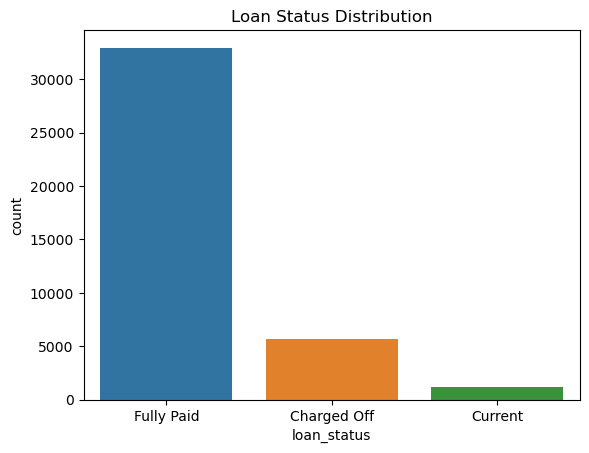

In [3]:
# Exploring Data Distribution
sns.countplot(x='loan_status', data=data)
plt.title('Loan Status Distribution')
plt.show()

####
Rows where the **loan_status = CURRENT will be dropped** as CURRENT loans are in progress and do not contribute to the decision-making process for determining loan pass or fail.

In [4]:
data = data[data['loan_status'] != 'Current']
data['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64

### Check Missing data

In [5]:
missing_perc = (data.isnull().sum()*100)/len(data)
missing_perc.sort_values(ascending=False)

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

#### Since there are columns which have 100% null values, we would like to delete them.

In [6]:
data.dropna(axis = 1, how = 'all', inplace = True)
# Verify the columns have been dropped
missing_perc = (data.isnull().sum()*100)/len(data)
missing_perc.sort_values(ascending=False)

mths_since_last_record        92.897322
mths_since_last_delinq        64.559193
desc                          32.477901
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
last_pymnt_d                   0.184047
chargeoff_within_12_mths       0.145164
collections_12_mths_ex_med     0.145164
revol_util                     0.129611
tax_liens                      0.101097
title                          0.028514
last_credit_pull_d             0.005184
sub_grade                      0.000000
collection_recovery_fee        0.000000
out_prncp                      0.000000
out_prncp_inv                  0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
last_pymnt_amnt                0.000000
term                           0.000000


### Deleting the columns with more than 50% missing data

In [7]:
data.drop(columns=[col for col in data.columns if data[col].isnull().mean() > 0.5], inplace=True)
# Verify the columns have been dropped
(data.isnull().sum()*100/len(data)).sort_values(ascending=False).head(10)

desc                          32.477901
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
last_pymnt_d                   0.184047
collections_12_mths_ex_med     0.145164
chargeoff_within_12_mths       0.145164
revol_util                     0.129611
tax_liens                      0.101097
title                          0.028514
dtype: float64

### Check if there are any duplicate rows or completely blank rows

In [8]:
# to check for rows if all elements are NaN
blank_rows = data.isnull().all(axis=1)
print(f"Number of completely blank rows: {blank_rows.sum()}")

Number of completely blank rows: 0


In [9]:
print(f"Number of duplicate rows: {data.duplicated().sum()}") if data.duplicated().any() else print("No duplicate rows found.")

No duplicate rows found.


### Check for columns in the dataset which have unique values

In [10]:
# Identify columns with unique values
unique_value_columns = [col for col in data.columns if data[col].nunique() == len(data)]

# Print unique value columns
print(f"Columns with unique values: {unique_value_columns}")

Columns with unique values: ['id', 'member_id', 'url']


#### These unique value columns can also be deleted as they are irrelevant for our case

In [11]:
# Drop columns with unique values
data.drop(columns=unique_value_columns, inplace=True)

### After above cleaning steps, Check the column names and if anyone irrelevant to our case

In [12]:
column_names=sorted(data.columns.values)
print(column_names)

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'verification_status', 'zip_code']


### Mapping the column names with the shared dictionary file - 'Data_Dictionary.xlsx'

In [13]:
# Load the dictionary file
dictionary = pd.read_excel('Data_Dictionary.xlsx', sheet_name='LoanStats')

# Create a mapping of column names to descriptions
description_mapping = pd.Series(dictionary.Description.values, index=dictionary.LoanStatNew).to_dict()

# Print descriptions for the specified column names
for col in column_names:
    print(f"{col}  : {description_mapping.get(col, 'Description not found')}")

acc_now_delinq  : The number of accounts on which the borrower is now delinquent.
addr_state  : The state provided by the borrower in the loan application
annual_inc  : The self-reported annual income provided by the borrower during registration.
application_type  : Indicates whether the loan is an individual application or a joint application with two co-borrowers
chargeoff_within_12_mths  : Number of charge-offs within 12 months
collection_recovery_fee  : post charge off collection fee
collections_12_mths_ex_med  : Number of collections in 12 months excluding medical collections
delinq_2yrs  : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
delinq_amnt  : The past-due amount owed for the accounts on which the borrower is now delinquent.
desc  : Loan description provided by the borrower
dti  : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the request

#### We aim to identify the key factors influencing loan pre-approval that lead to customer defaults.
#### Therefore, the below-mentioned features can be excluded from further analysis as they either correspond to post-approval of the loan or are irrelevant:
- Irrelevant for analysis: addr_state, desc, emp_title, last_credit_pull_d, title, zip_code

- Useful for investors but not contributing to loan defaulting analysis: out_prncp_inv, total_pymnt_inv

- Post-approval: chargeoff_within_12_mths, collection_recovery_fee, collections_12_mths_ex_med, delinq_2yrs, last_pymnt_amnt, last_pymnt_d, out_prncp, recoveries, revol_bal, tax_liens, total_pymnt, total_rec_int, total_rec_late_fee, total_rec_prncp

In [14]:
# List of columns to be dropped
cols_to_drop = [ 'acc_now_delinq', 'addr_state', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc', 'emp_title', 'initial_list_status', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'pymnt_plan', 'policy_code', 'recoveries', 'revol_bal', 'tax_liens', 'title', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'zip_code']
len(cols_to_drop)

28

In [15]:
print(f"Dataset shape before removing columns {data.shape}")
data.drop(columns=cols_to_drop, inplace=True)
print(f"Dataset shape after removing columns {data.shape}")

Dataset shape before removing columns (38577, 51)
Dataset shape after removing columns (38577, 23)


## Missing value treatment
Now, let's check if there are still missing values and if we need to impute them

In [16]:
((data.isnull().sum()*100)/len(data)).sort_values(ascending=False).head()

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
issue_d                 0.000000
total_acc               0.000000
dtype: float64

##### Three variables - emp_length, pub_rec_bankruptcies & revol_util are to be treated for missing values.
##### 1. Starting with emp_length

In [17]:
data.emp_length.info()

<class 'pandas.core.series.Series'>
Index: 38577 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
37544 non-null  object
dtypes: object(1)
memory usage: 602.8+ KB


In [18]:
data.emp_length.value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

##### The mode's high frequency allows safe imputation of null values. With a low percentage of missing data, this imputation won't significantly impact the analysis.

In [19]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)

##### 2. Analysing pub_rec_bankruptcies in similar way

In [20]:
data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36238
1.0     1637
2.0        5
Name: count, dtype: int64

##### Although pub_rec_bankruptcies is numerical, it has only three unique values, making the mode the best estimator for replacement.

In [21]:
data.pub_rec_bankruptcies.fillna(data.pub_rec_bankruptcies.mode()[0], inplace = True)
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].astype('int32')

##### 3. For revol_until:

In [22]:
print(data[ "revol_util"].value_counts())

revol_util
0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1088, dtype: int64


##### For revol_until
- Removing the % sign from revol_until and converting it to float
- The median is a robust measure that won't be affected by outliers and will provide a central value for imputation

In [23]:
data['revol_util'] = data['revol_util'].str.rstrip('%')
data['revol_util'].fillna(data['revol_util'].median(), inplace=True)

### Data type conversion

In [24]:
pd.set_option('display.max_columns', None)
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70,9,0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40,4,0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50,10,0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21,37,0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30,12,0


#### Columns that are identified to be corrected are as follows:
- term: Convert from string (e.g., "36 months") to integer (e.g., 36).
- int_rate: Convert from string (e.g., "10.65 %") to float (e.g., 10.65).
- emp_length: Convert from string (e.g., "10+ years", "< 1 year") to integer (e.g., 10, 0).
- issue_d: Convert from string (e.g., "Dec-11") to datetime.
- earliest_cr_line: Convert from string (e.g., "Jan-85") to datetime.
- pub_rec: Convert from int64 to int32.

In [25]:
# Convert 'term' from string to integer
data['term'] = data['term'].str.extract('(\d+)').astype(int)

# Convert 'int_rate' from string to float
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)

# Convert 'emp_length' from string to integer
data['emp_length'] = data['emp_length'].replace({'10+ years': '10', '< 1 year': '0', 'n/a': '0'}).str.extract('(\d+)').astype(int)

# Convert 'issue_d' and 'earliest_cr_line' from string to datetime
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')

data['pub_rec']=data['pub_rec'].astype('int32')

#### Deriving features from issue_d which might allow time based grouping analysis

In [26]:
# Extract issue year and month from 'issue_d'
data['issue_year'] = data['issue_d'].dt.year
data['issue_month'] = data['issue_d'].dt.month

#### Data analysis post cleaning

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int32         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  int32         
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

### Outliers treatment

In [28]:
def get_iqr_all_columns(data, multiplier=1.5):
    iqr_info = {}
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1, Q3 = data[column].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        iqr_info[column] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': Q1 - multiplier * IQR,
            'upper_bound': Q3 + multiplier * IQR
        }
    return iqr_info

In [29]:
def outlier_comparison_all_columns(data):
    iqr_info = get_iqr_all_columns(data)
    for column, bounds in iqr_info.items():
        new_data = data[(data[column] >= bounds['lower_bound']) & (data[column] <= bounds['upper_bound'])]

        fig, axes = plt.subplots(1, 2, figsize=(14, 3))
        sns.boxplot(data[column], ax=axes[0], orient="h").set_title(f'Original [{column}]')
        sns.boxplot(new_data[column], ax=axes[1], orient="h").set_title(f'Post Outlier Treatment [{column}]')
        plt.tight_layout()
        plt.show()

In [30]:
def drop_outliers_all_columns(data):
    iqr_info = get_iqr_all_columns(data)
    for column, bounds in iqr_info.items():
        data = data[data[column] < bounds['upper_bound']]
    return data

#

### Univariate Analysis

#### 1. Numerical Columns

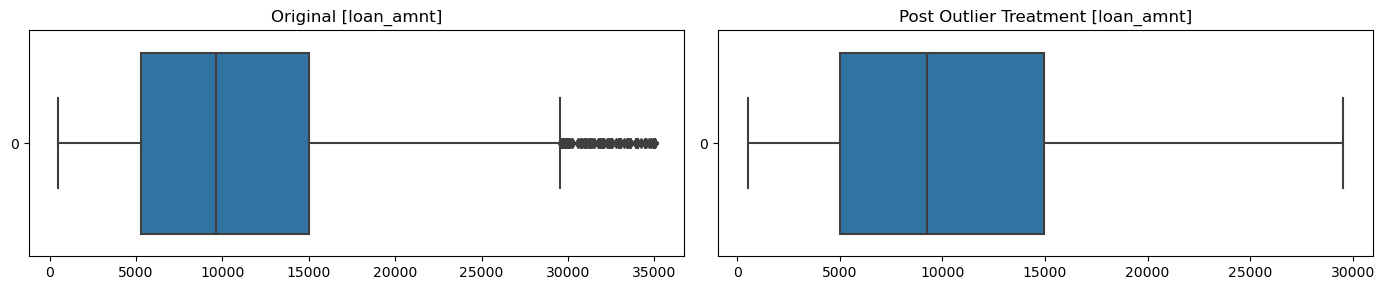

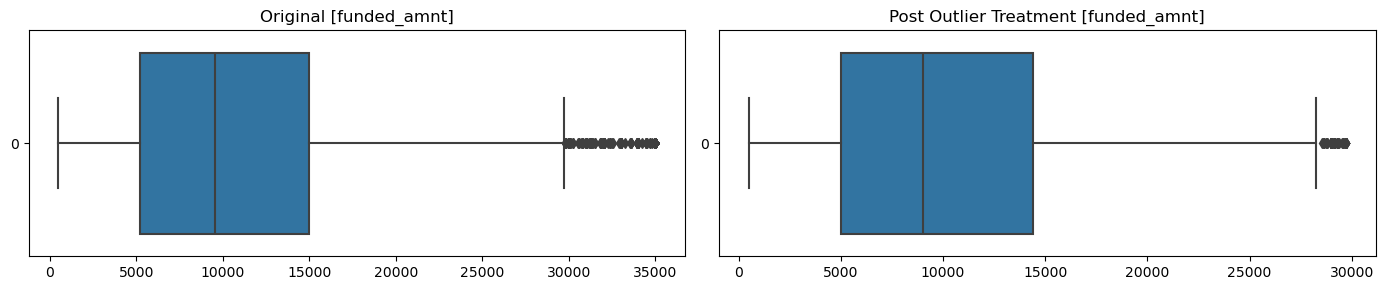

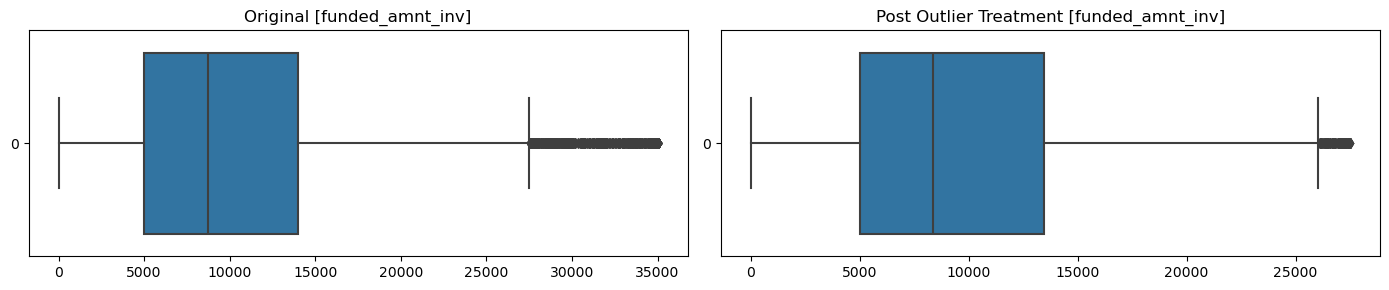

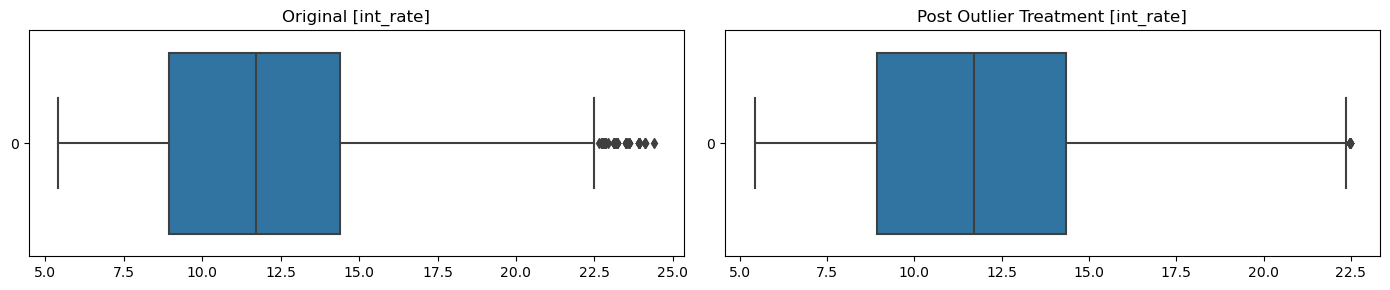

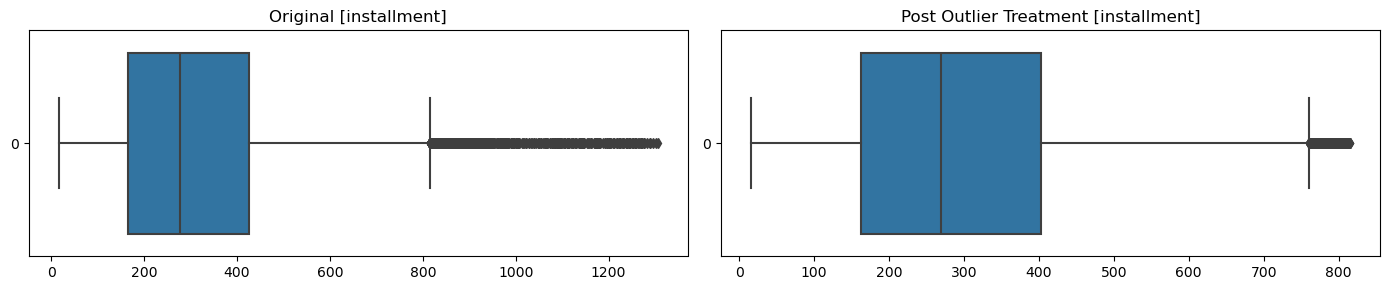

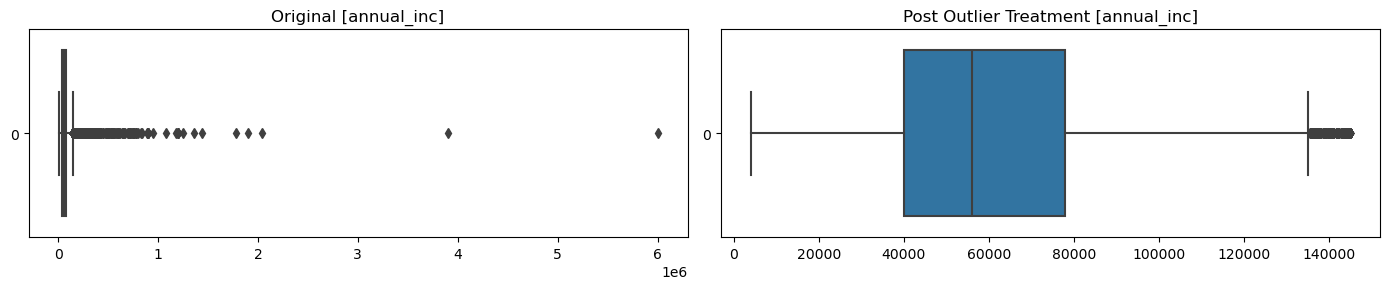

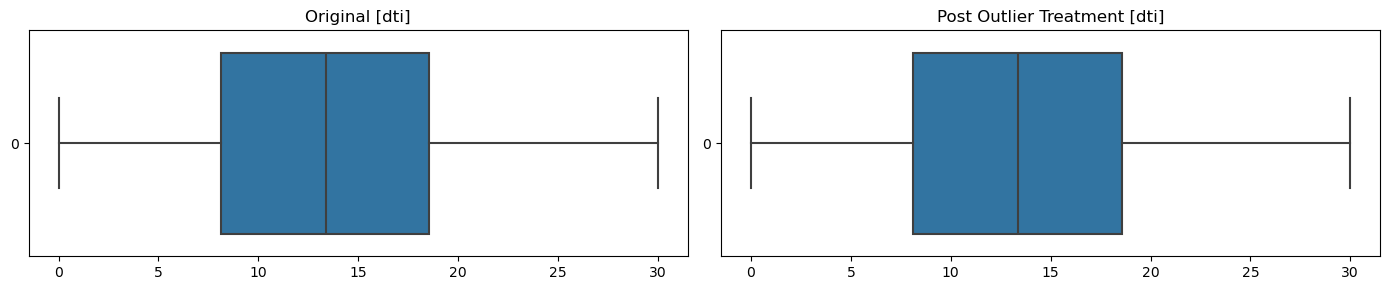

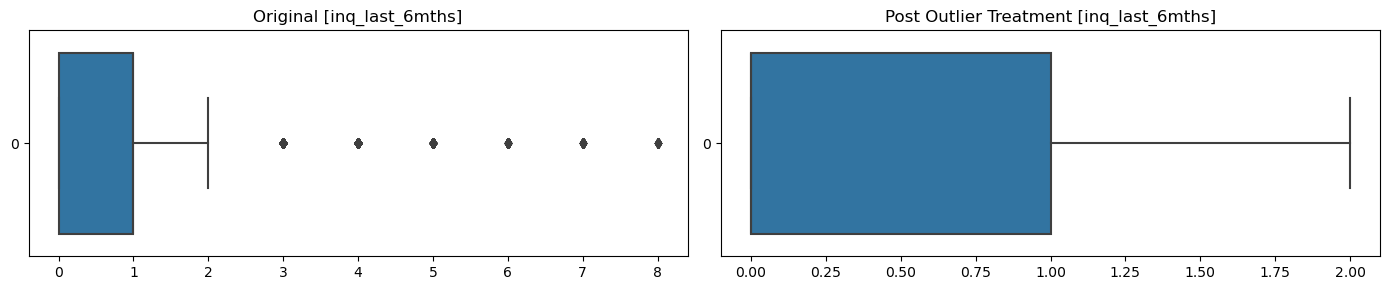

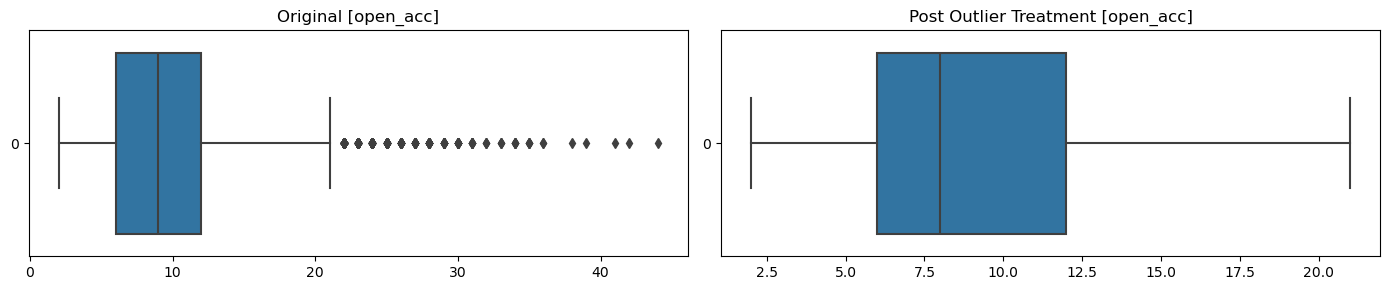

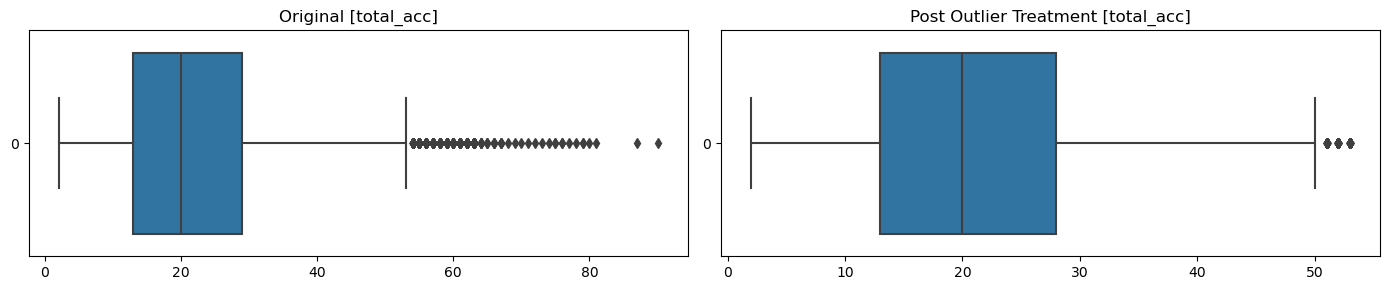

In [31]:
outlier_comparison_all_columns(data)

#### 2. Categorical Columns

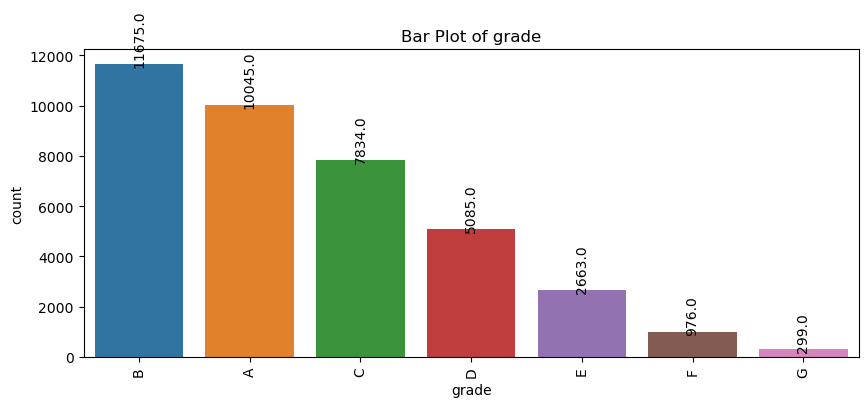

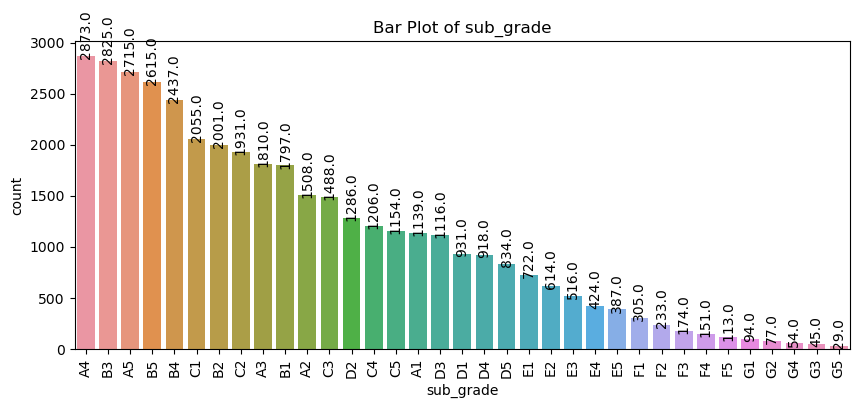

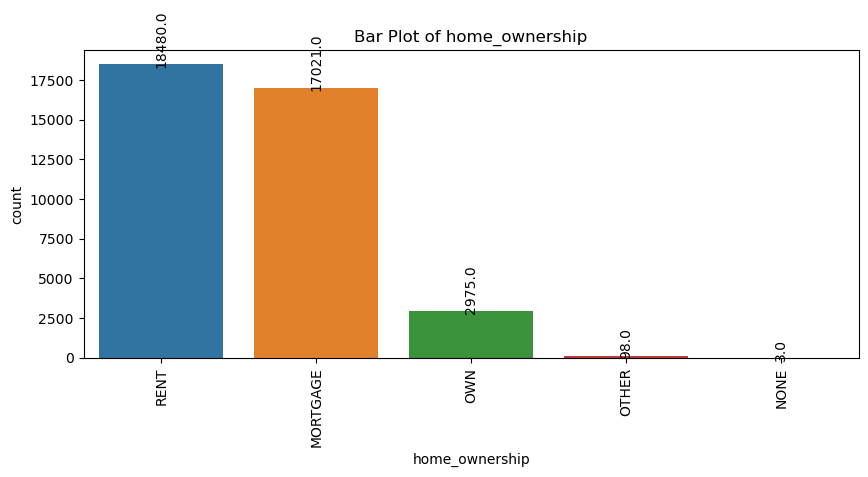

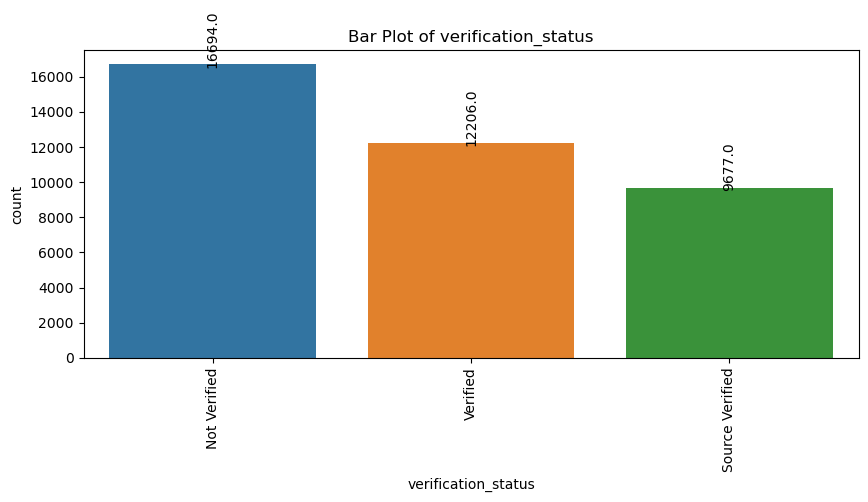

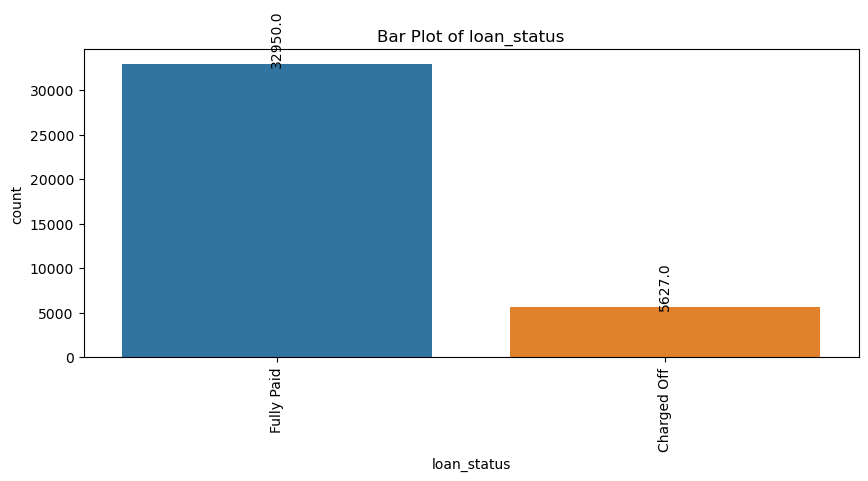

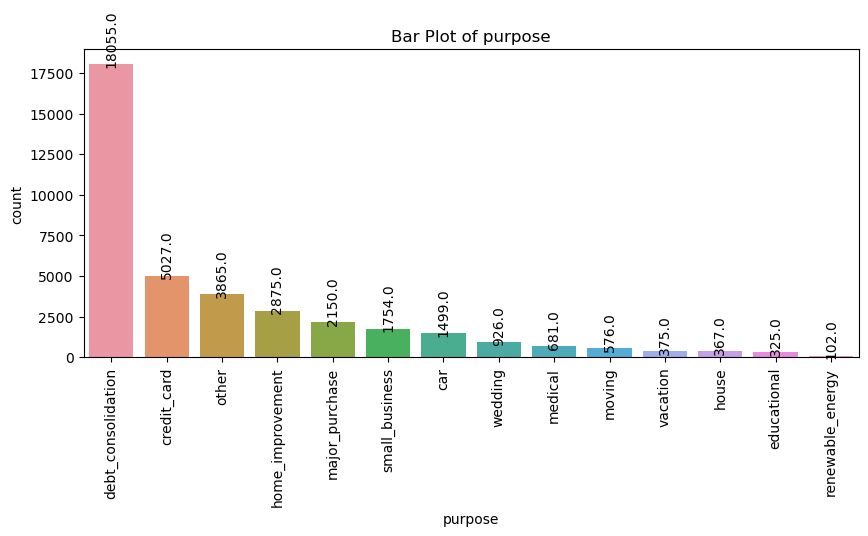

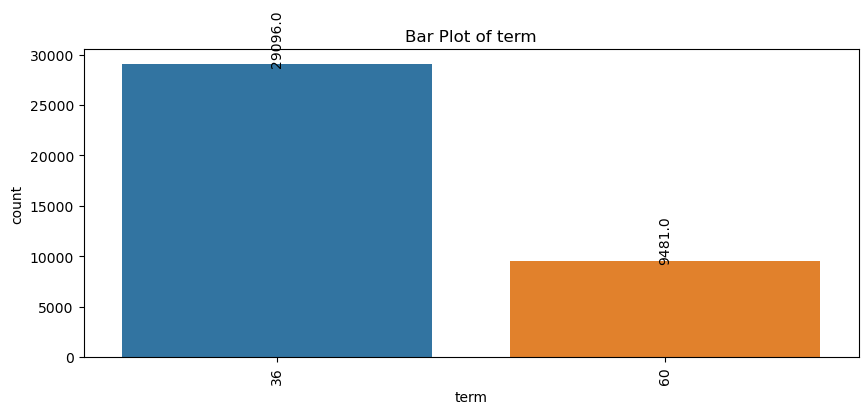

In [32]:
# List of categorical columns
categorical_columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'term']

# Bar plots with values at the top
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=data[column], order=data[column].value_counts().index)
    ax.set_title(f'Bar Plot of {column}')
    plt.xticks(rotation=90)
    
    # Add values at the top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', rotation=90)
    plt.show()


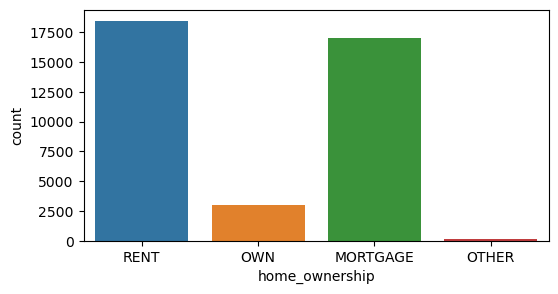

In [33]:
## Replacing 'NONE' with 'OTHER' in the home_ownership column as there are only three values for NONE
data['home_ownership'].replace('NONE', 'OTHER', inplace=True)
plt.figure(figsize=(6, 3))
sns.countplot(x='home_ownership',data=data)
plt.show()

#### Density plots

In [34]:
def density_plots(data):

    cols_kde=data.select_dtypes(exclude=['object', 'datetime64[ns]']).columns

    for column in cols_kde:
        plt.figure(figsize=(10, 4))
        sns.histplot(data[column].dropna(), kde=True)
        plt.xlabel(column)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
        plt.show()

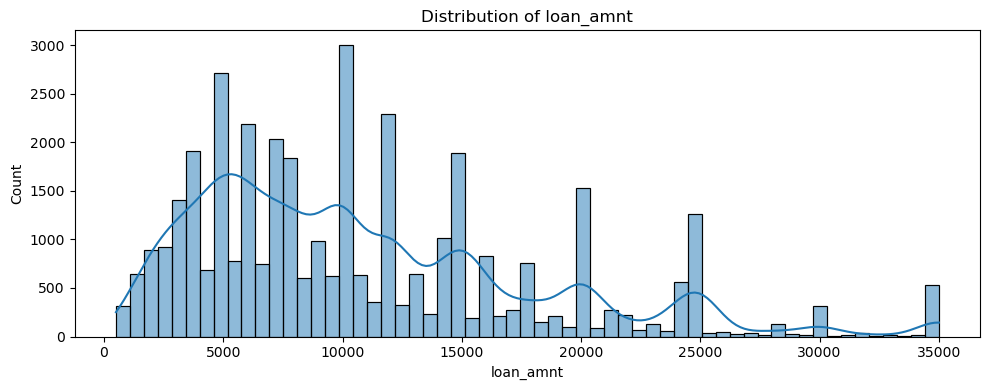

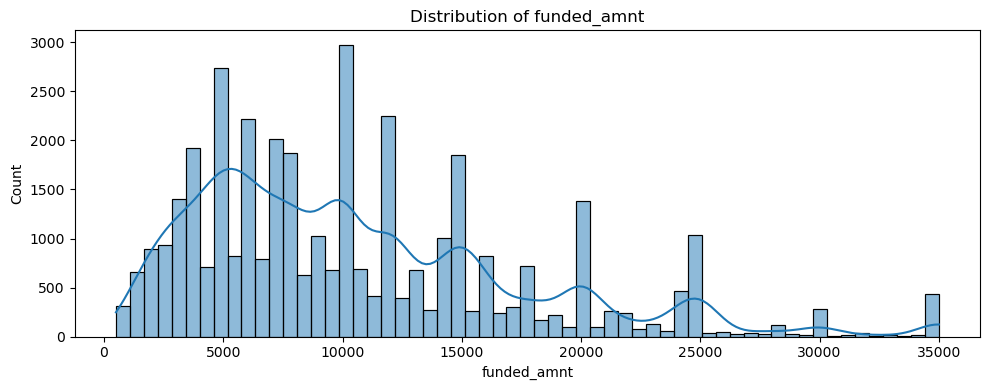

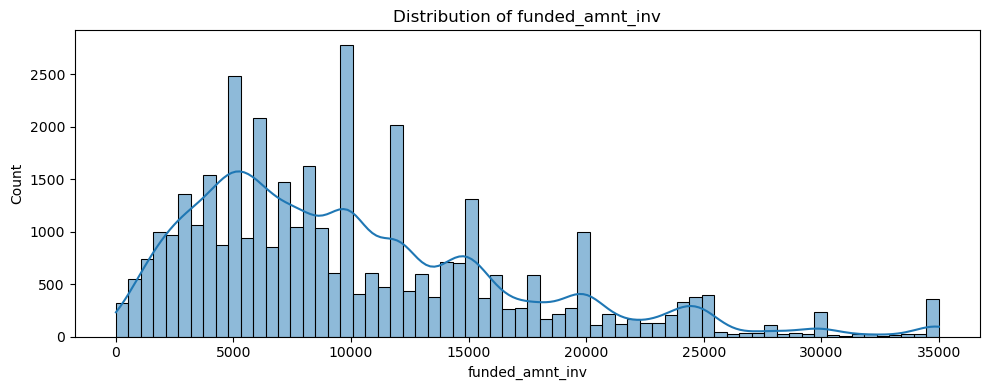

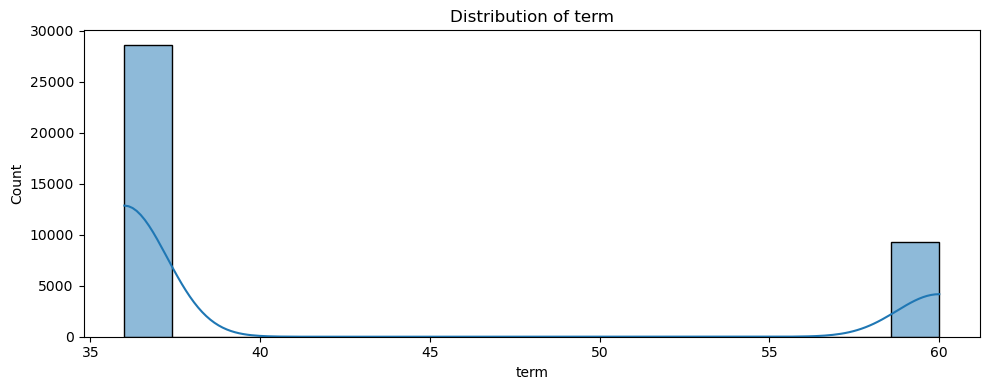

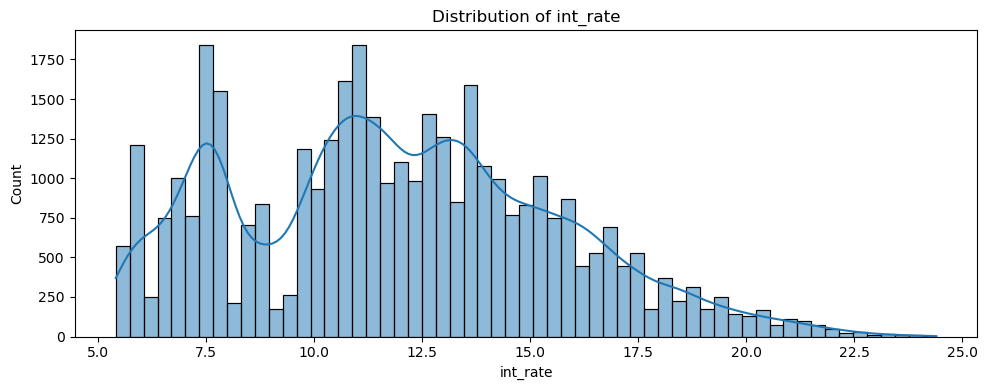

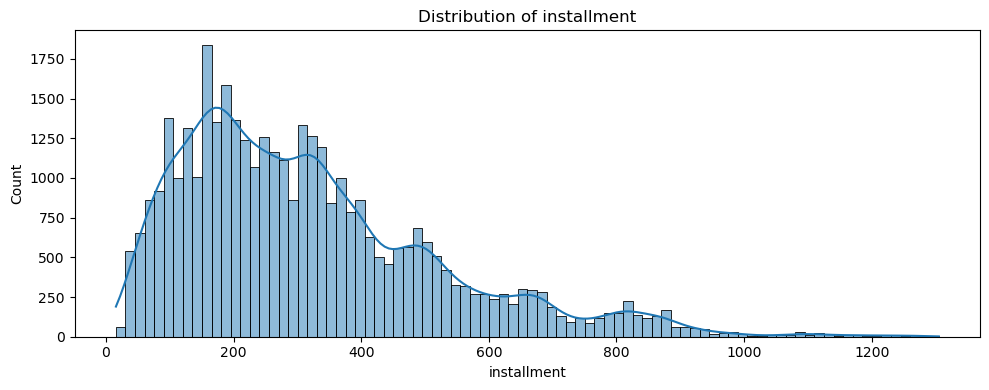

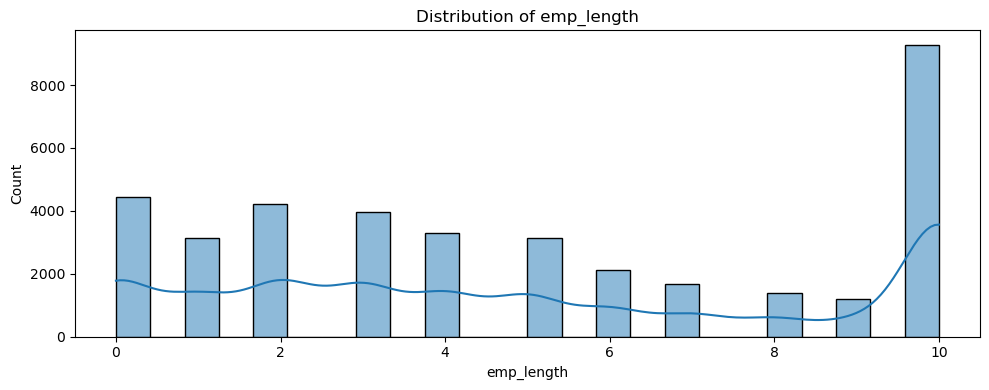

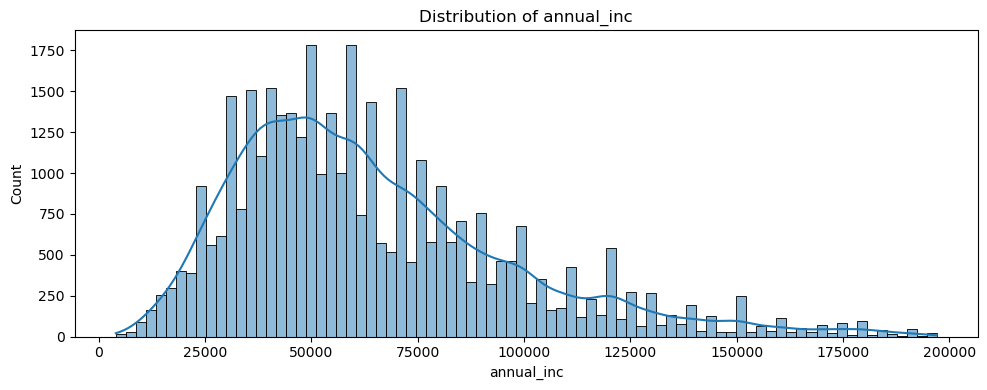

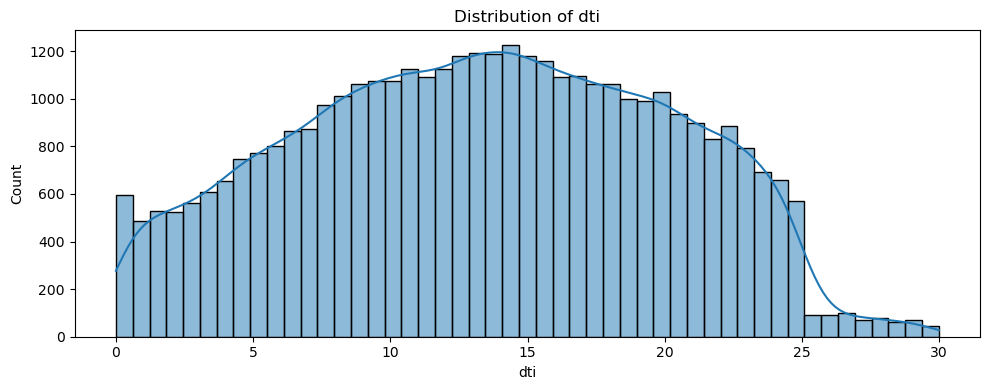

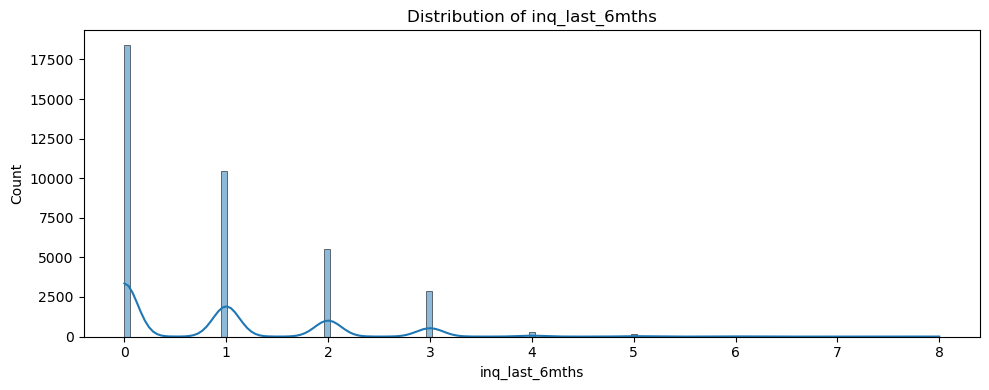

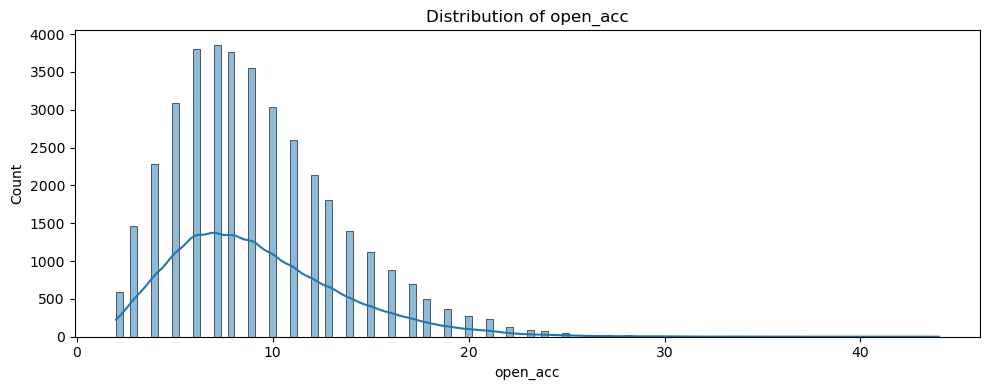

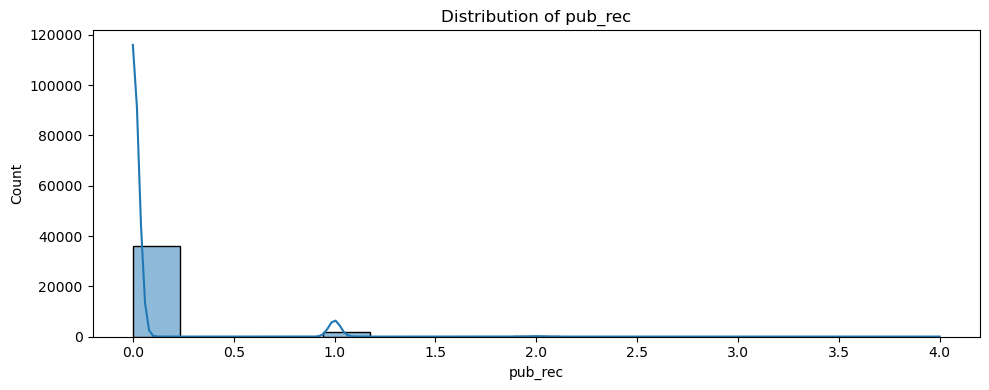

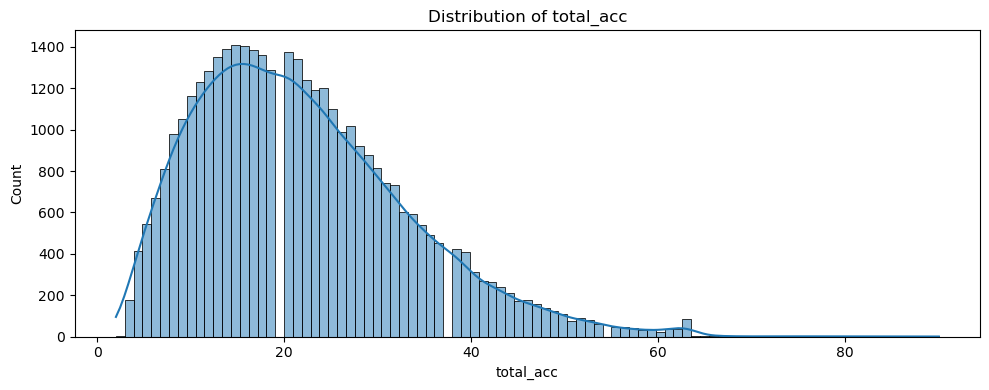

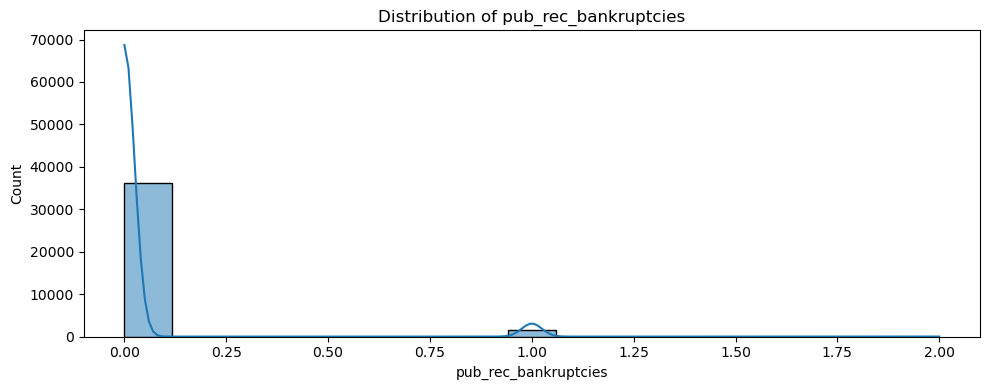

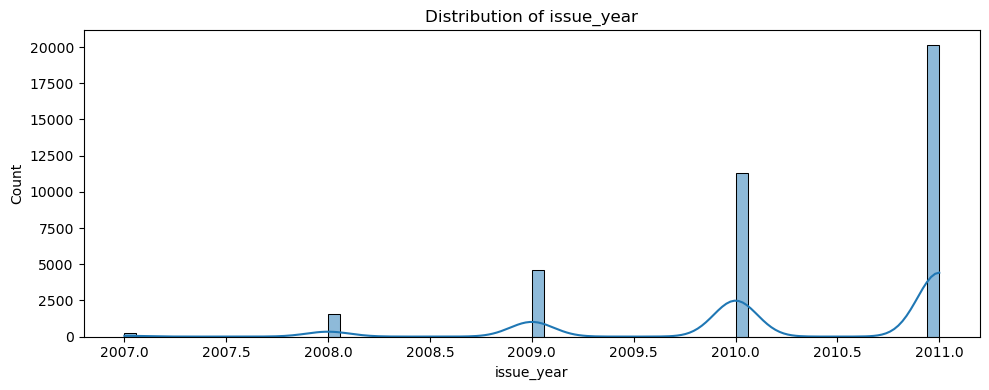

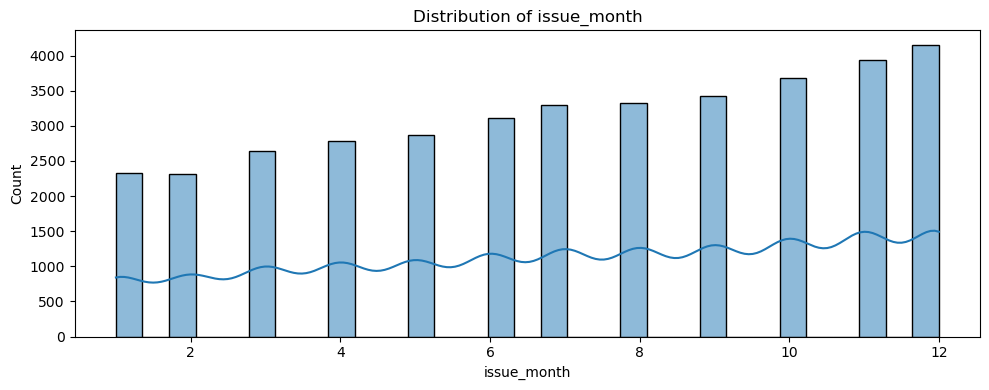

In [35]:
new_data = data[(data['annual_inc'] >= data['annual_inc'].mean() - 2 * data['annual_inc'].std()) & (data['annual_inc'] <= data['annual_inc'].mean() + 2 * data['annual_inc'].std())]
density_plots(new_data)

### Univariate Analysis Summary

#### Customer Insights
- Most homeowners are either renting or have a mortgage : home_ownership
- The highest number of loan applications are for debt consolidation : Purpose
- The majority of customers have an employment length of 10+ years : emp_length
- Most loan applicants have an annual income between 40K-60K : annual_inc
- The majority of debt-to-income ratios range from 8 to 19 : dti

#### Loan Characteristics
- Most loan amounts fall within the range of 5K to 15K : loan_amnt
- The majority of interest rates falling within the 9% to 11.5% range suggests that most loans are priced within this band. This could indicate a standard pricing strategy for the majority of borrowers : int_rate
- The majority of installment amounts are between 160 and 400: installment
- Most loan applications are for a term of 36 months : term
- The majority of loan applications fall under Grade B : grade

#### Temporal Trends
- Loan application counts are increasing year over year : issue_year
- The highest loan application volume is in Dec month : issue_month
- The lowest loan applications are in first half of the year (Jan-Jun) : issue_month.

#

### Bivariate Analysis

##### 1. Loan Status vs. Interest Rate

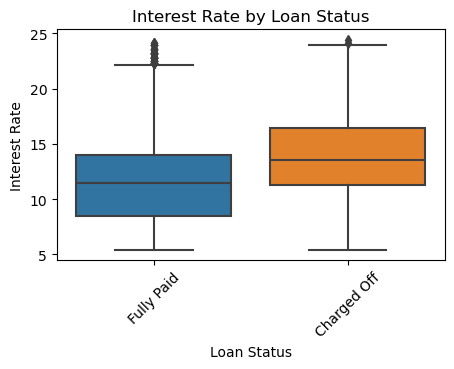

In [36]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=new_data['loan_status'], y=new_data['int_rate'])
plt.title('Interest Rate by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.xticks(rotation=45)
plt.show()

##### **It helps identify that charged off loans are associated with higher interest rates as compared with fully paid loans.**

##### 2. Loan Amount vs. Grade

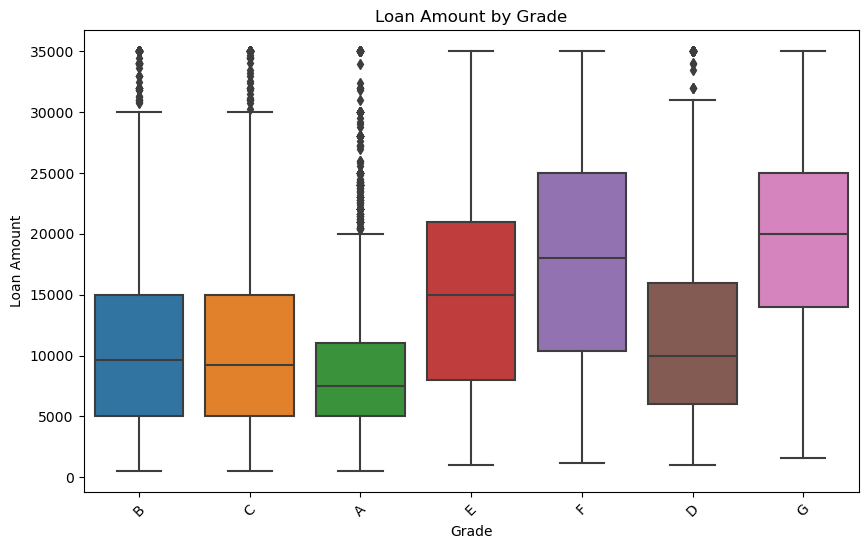

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data['grade'], y=new_data['loan_amnt'])
plt.title('Loan Amount by Grade')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

##### **This plot shows the distribution of loan amounts across different grades. It helps identify grade 'G' is associated with higher loan amounts.**

#### 3. Debt-to-Income Ratio vs. Loan Status

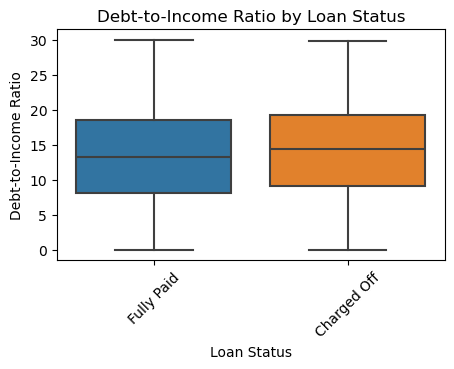

In [38]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=new_data['loan_status'], y=new_data['dti'])
plt.title('Debt-to-Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Debt-to-Income Ratio')
plt.xticks(rotation=45)
plt.show()

##### **Higher debt-to-income ratios are associated with higher default rates.**

#### 4. Loan Amount vs. Employment Length

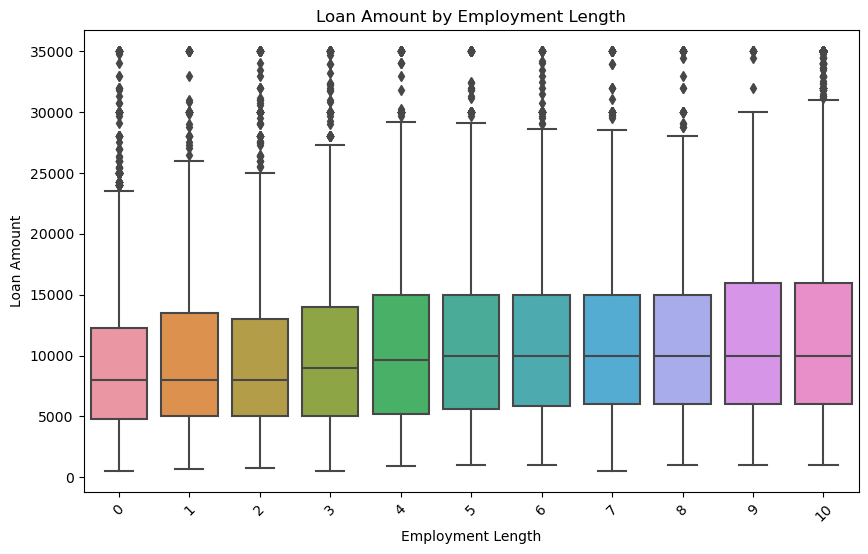

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=new_data['emp_length'], y=new_data['loan_amnt'])
plt.title('Loan Amount by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

##### **Longer employment lengths are associated with higher loan amounts**

#### 5. Verification Status vs. Loan Amount

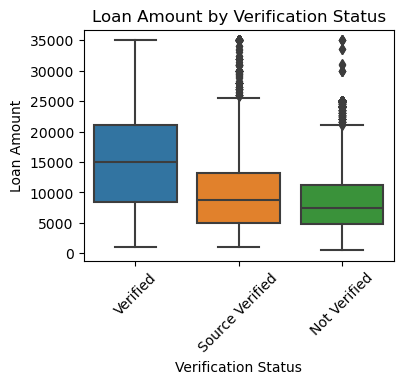

In [40]:
plt.figure(figsize=(4, 3))
sns.boxplot(x=data['verification_status'], y=data['loan_amnt'])
plt.title('Loan Amount by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()

##### **Verified loans are associated with higher loan amounts**

#### 6. To analyze and identify risk factors, let's focus on the charged_off cases.

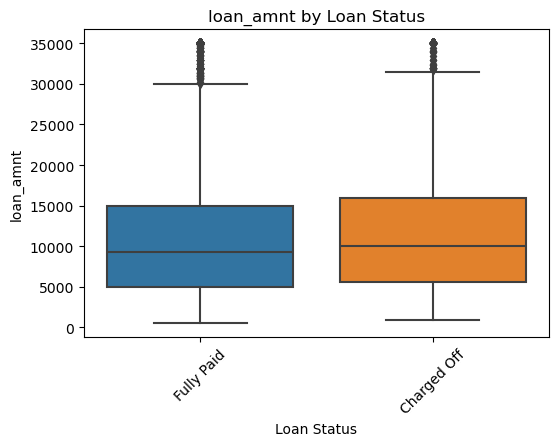

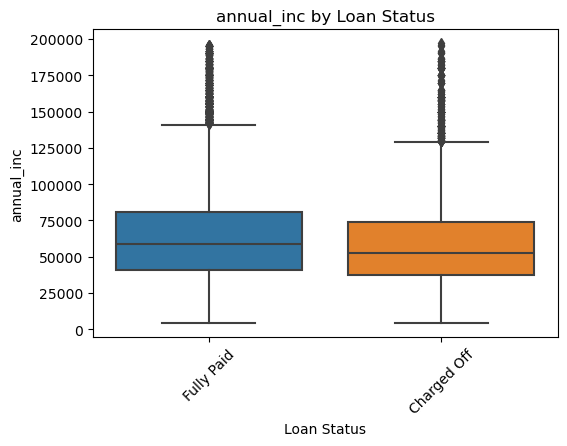

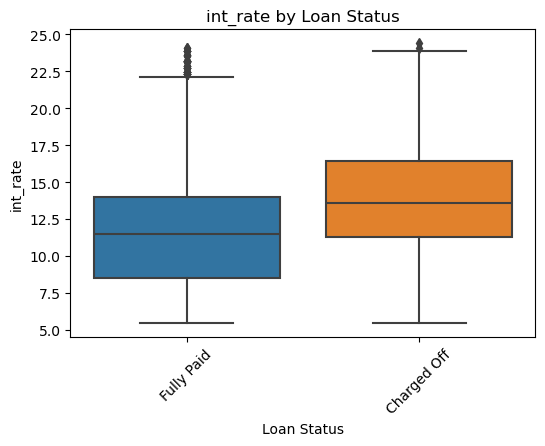

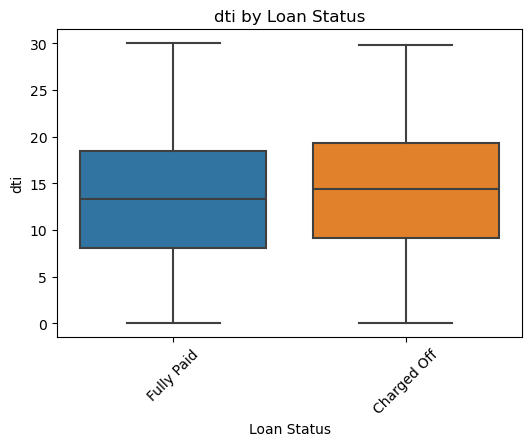

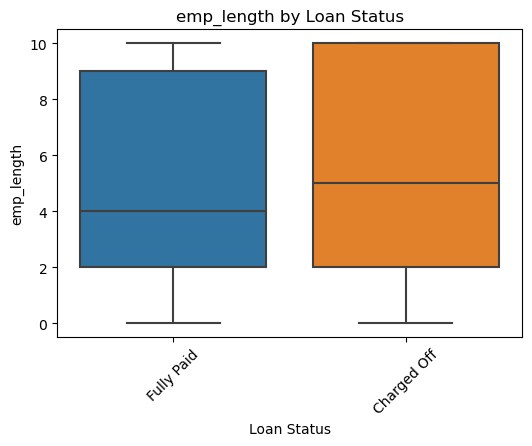

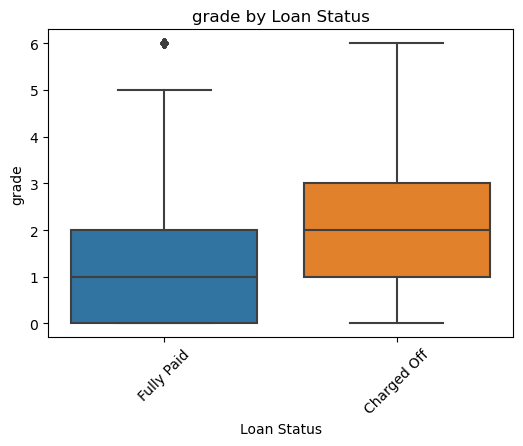

In [41]:
# Filter charged_off and fully_paid cases
charged_off = new_data[new_data['loan_status'] == 'Charged Off']
fully_paid = new_data[new_data['loan_status'] == 'Fully Paid']

# Compare key variables
variables = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'emp_length', 'grade']

# Convert the categorical column to numerical codes
new_data['grade'] = new_data['grade'].astype('category').cat.codes
new_data['home_ownership'] = new_data['home_ownership'].astype('category').cat.codes

# Plot comparisons
for var in variables:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='loan_status', y=var, data=new_data[new_data['loan_status'].isin(['Charged Off', 'Fully Paid'])])
    plt.title(f'{var} by Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.show()

### Bivariate Analysis Summary:
- Interest Rates and Loan Status: Charged-off loans tend to have higher interest rates compared to fully paid loans.
- Loan Amounts and Grade: Loans with a grade of 'G' are typically associated with higher loan amounts.
- Debt-to-Income Ratio and Default Rates: Higher debt-to-income ratios are linked to increased default rates.
- Employment Length and Loan Amounts: Longer employment lengths are correlated with higher loan amounts.
- Verification Status and Loan Amounts: Verified loans are generally associated with higher loan amounts.

***Summary of Charged-Off Cases Analysis***

- Loan Amount: Borrowers with larger loan amounts are at a higher risk of default.
- Annual Income: Borrowers in charged-off cases generally have lower annual incomes. This suggests that lower-income borrowers may struggle more with loan repayments, leading to higher default rates.
- Interest Rate: Charged-off loans are associated with higher interest rates. This implies that riskier loans, which are charged higher interest rates, are more likely to default.
- Debt-to-Income Ratio (DTI): The debt-to-income ratio is slightly higher in charged-off cases. This indicates that borrowers with higher debt relative to their income are at a greater risk of default.
- Employment Length: The median and upper end of employment length are slightly higher in charged-off cases. This suggests that even borrowers with longer employment histories can still be at risk of default, possibly due to other financial factors.
- Grades: Charged-off loans are associated with lower grades (numerically higher). This indicates that loans with lower grades are considered riskier and are more likely to default.

### Multivariate analysis

Mapping of Categorical Variables:
Loan Status Mapping:
   loan_status
0  Charged Off
1   Fully Paid

Grade Mapping:
  grade
0     A
1     B
2     C
3     D
4     E
5     F
6     G

Home Ownership Mapping:
  home_ownership
0       MORTGAGE
1          OTHER
2            OWN
3           RENT


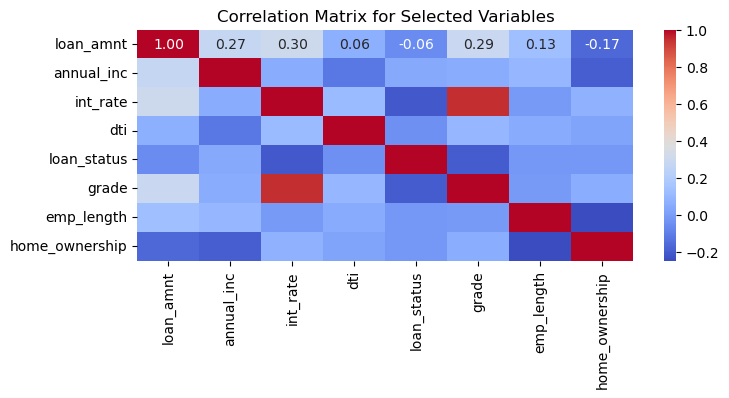

                loan_amnt  annual_inc  int_rate       dti  loan_status  \
loan_amnt        1.000000    0.268999  0.301265  0.062436    -0.059463   
annual_inc       0.268999    1.000000  0.048899 -0.121530     0.040867   
int_rate         0.301265    0.048899  1.000000  0.110913    -0.211390   
dti              0.062436   -0.121530  0.110913  1.000000    -0.045078   
loan_status     -0.059463    0.040867 -0.211390 -0.045078     1.000000   
grade            0.286211    0.051295  0.948255  0.096765    -0.201869   
emp_length       0.129729    0.093863 -0.011139  0.045862    -0.023377   
home_ownership  -0.170651   -0.195406  0.070082  0.024151    -0.022990   

                   grade  emp_length  home_ownership  
loan_amnt       0.286211    0.129729       -0.170651  
annual_inc      0.051295    0.093863       -0.195406  
int_rate        0.948255   -0.011139        0.070082  
dti             0.096765    0.045862        0.024151  
loan_status    -0.201869   -0.023377       -0.022990  
gra

In [42]:
# Select the relevant columns
selected_columns = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'loan_status', 'grade', 'emp_length', 'home_ownership']
data_selected = data[selected_columns]

# Convert categorical variables to numerical codes
data_selected['loan_status'] = data_selected['loan_status'].astype('category').cat.codes
data_selected['grade'] = data_selected['grade'].astype('category').cat.codes
data_selected['home_ownership'] = data_selected['home_ownership'].astype('category').cat.codes

# Print the mapping of categorical variables
print("Mapping of Categorical Variables:")
print("Loan Status Mapping:")
print(data[['loan_status']].drop_duplicates().sort_values('loan_status').reset_index(drop=True))
print("\nGrade Mapping:")
print(data[['grade']].drop_duplicates().sort_values('grade').reset_index(drop=True))
print("\nHome Ownership Mapping:")
print(data[['home_ownership']].drop_duplicates().sort_values('home_ownership').reset_index(drop=True))

# Calculate the correlation matrix
corr_matrix = data_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Selected Variables')
plt.show()

# Print the correlation matrix
print(corr_matrix)

##### **Insights:**
- Loan Amount and Annual Income: A moderate positive correlation (0.269) suggests that higher annual incomes are associated with higher loan amounts.
- Loan Amount and Interest Rate: A moderate positive correlation (0.301) indicates that higher loan amounts are associated with higher interest rates.
- Annual Income and Debt-to-Income Ratio: A weak negative correlation (-0.122) suggests that higher annual incomes are associated with lower debt-to-income ratios.
- Interest Rate and Loan Status: A moderate negative correlation (-0.211) indicates that higher interest rates are associated with a higher likelihood of loan defaults.
- **Grade and Interest Rate: A very strong positive correlation (0.948) suggests that lower grades (numerically higher) are associated with higher interest rates.**
- Employment Length and Loan Amount: A weak positive correlation (0.130) suggests that longer employment lengths are associated with higher loan amounts.
- Home Ownership and Loan Amount: A weak negative correlation (-0.171) indicates that homeowners may qualify for smaller loans compared to renters.
- Home Ownership and Annual Income: A weak negative correlation (-0.195) suggests that homeowners may have slightly lower annual incomes compared to renters.
- Home Ownership and Employment Length: A moderate negative correlation (-0.249) indicates that homeowners tend to have shorter employment lengths compared to renters.

#

## Conclusion:
***The analysis of charged-off cases reveals several key risk factors associated with loan defaults.
Borrowers with higher loan amounts, lower annual incomes, higher interest rates, and higher debt-to-income ratios are more likely to default. Additionally, even borrowers with longer employment lengths and lower loan grades are at risk.
These insights can help lenders identify high-risk borrowers and implement strategies to mitigate default risks, such as offering financial counseling, adjusting loan terms, or implementing stricter lending criteria.***

#####
Pandas version: 2.1.4
Seaborn version: 0.12.2
Matplotlib version: 3.8.0
numpy version: 1.26.4
Python version: 3.11.7